<img src="http://vision.skills.network/logo-light.png" width="400" alt="CV Studio logo"  />


Estimated time needed: **30** minutes


<h2>Load the Saved KNN model to Classify Images</h2>
<h3>Project: Training_an_image_classifier_with_KNN</h3>
<h3>Application: Use - KNN image classifier</h3>


You will upload your image and classify it using the K-Nearest Neighbours (KNN) algorithm we saved in the <code>train</code> run.


## Objectives


<ul>
    <li>This tool contains the following sections:
        <ul>
            <li>Load important libraries</li>
            <li>Load your saved KNN model</li>
            <li>Upload your image</li>
            <li>Classify your image</li>
        </ul>
    </li>

</ul>


***


## Load Important Libraries


Libraries for data processing and visualization:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Libraries for image pre-processing and classification:


In [2]:
import cv2

Libraries for Computer Vision Studio:


In [3]:
from skillsnetwork import cvstudio

## Setup CV Studio Client, Get the Model and Annotations


In [4]:
# Initialize the CV Studio Client
cvstudioClient = cvstudio.CVStudio()

Get the annotations from the CV Studio project:


In [5]:
annotations = cvstudioClient.get_annotations()

Download the model (for k-NN this means samples and format):


In [6]:
model_details = cvstudioClient.downloadModel()

Get k_best from model details (we reported this previously when training):


In [7]:
k_best = model_details["k_best"]

Load and re-train model:


In [8]:
## get the model from the cv studio storage
fs = cv2.FileStorage(model_details['filename'], cv2.FILE_STORAGE_READ)
knn_yml = fs.getNode('opencv_ml_knn')

knn_format = knn_yml.getNode('format').real()
is_classifier = knn_yml.getNode('is_classifier').real()
## number of samples
default_k = knn_yml.getNode('default_k').real()
## sample arrays
samples = knn_yml.getNode('samples').mat()
## labels of sample
responses = knn_yml.getNode('responses').mat()
fs.release
knn = cv2.ml.KNearest_create()
knn.train(samples,cv2.ml.ROW_SAMPLE,responses)

True

## Test Our Model with an Uploaded Image


Upload your image, and see if it will be correctly classified.

<p><b>Instructions on How to Upload an Image:</b></p>
Use the upload button and upload an image from your local machine:
<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images/instruction.png" width="300"  />
</center>


The image will now be in the directory in which you are working in. To read the image in a new cell, use the <code>cv2.imread</code> and read its name. For example, I uploaded <code>anothercar.jpg</code> into my current working directory - <code>cv2.imread("anothercar.jpg")</code>.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images/instruction2.png" width="300"  />
</center>


Replace <code>your_uploaded_file</code> below with the name of your image as seen in your directory:


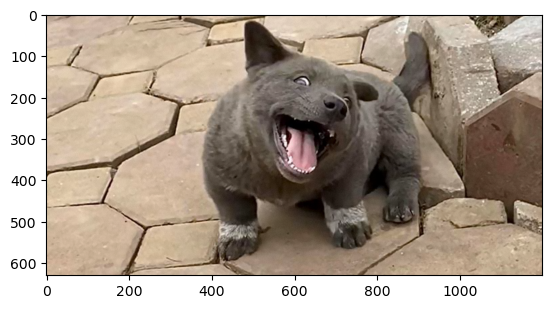

In [10]:
my_image = cv2.imread("puppy.png")
## let's see what the image looks like
image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Convert image to grayscale - grayscale simplifies the algorithm and reduces computational requirements.


In [11]:
#make images gray
my_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)

Resize the image to reduce the size:


In [12]:
my_image = cv2.resize(my_image, (32, 32))

Flatten the image into a numpy array:


In [13]:
pixel_image = my_image.flatten()
pixel_image = np.array([pixel_image]).astype('float32')

Classify the image and print out the result of the model:


In [14]:
ret,result,neighbours,dist = knn.findNearest(pixel_image,k=k_best)
print(neighbours)
print('Your image was classified as a ' + str(annotations['labels'][int(ret)]))

[[0. 0.]]
Your image was classified as a dog


When we print out the neigbours, it tells you the <code>k</code> closest classes and uses a majority voting process to pick what your image may be classified as.


## Congratulations! I can now show you my neigbours and you will tell me who I am!!

You can go back to the 👉🏾 <a href="https://vision.skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-cvstudio-2021-01-01"> CV Studio</a> 👈🏾 tool anytime to view your saved projects


<h2>Authors</h2>


[Aije Egwaikhide](https://www.linkedin.com/in/aije-egwaikhide/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-cvstudio-2021-01-01) is a Data Scientist at IBM who holds a degree in Economics and Statistics from the University of Manitoba and a Post-grad in Business Analytics from St. Lawrence College, Kingston. She is currently pursuing her Masters in Management Analytics at Queens University. She is part of the IBM Developer Skills Network group where she brings her real-world experience to the courses she creates.


<h2>Change Log</h2>


<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2021-04-10</td>
        <td>1.1</td>
        <td>Aije</td>
        <td>Fixed grammatical errors and made comments headings</td>
    </tr>
    <tr>
        <td>2021-04-09</td>
        <td>1.0</td>
        <td>Aije</td>
        <td>Updated to new template</td>
    </tr>
    <tr>
        <td>2021-02-24</td>
        <td>0.1</td>
        <td>Aije</td>
        <td>Created original version of the lab</td>
    </tr>
</table>


Copyright © 2021 IBM Corporation. All rights reserved.
